In [1]:
import sys
sys.executable



'/Users/sg/Documents/PROJECTS/spam-detection/.venv/bin/python3.13'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

In [5]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull()



,label,message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


### Check Class Distribution


In [8]:

df['label'].value_counts()


label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df.isnull().sum()

label      0
message    0
dtype: int64

### Visualize Class Distribution

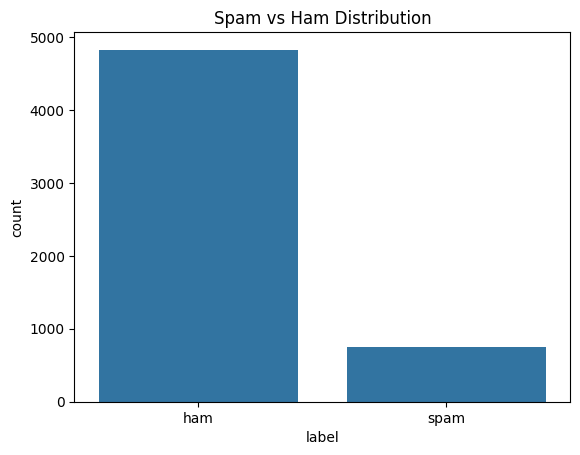

In [10]:


sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()


In [11]:
df['message_length'] = df['message'].apply(len)
df.head()


,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
df.groupby('label')['message_length'].mean()


label
ham      71.023627
spam    138.866131
Name: message_length, dtype: float64

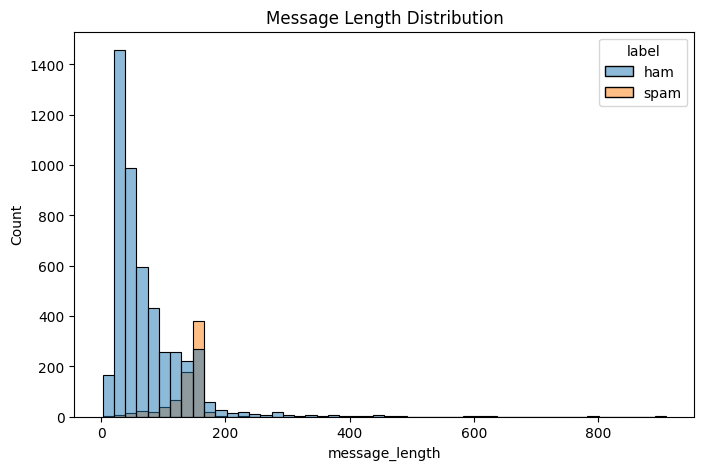

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='message_length', hue='label', bins=50)
plt.title("Message Length Distribution")
plt.show()


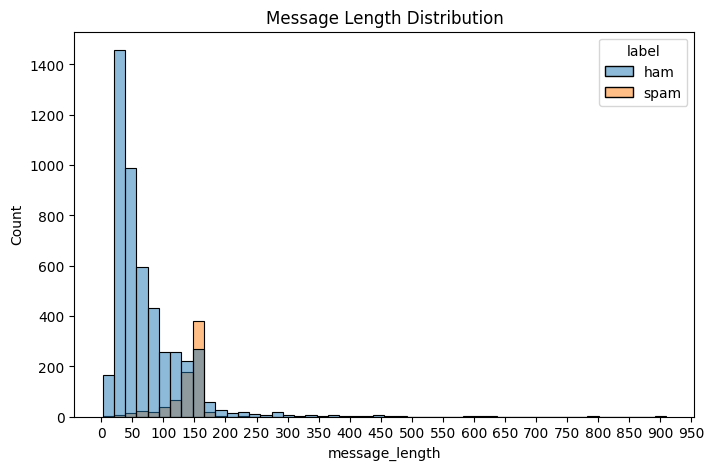

In [14]:
plt.figure(figsize=(8,5))

sns.histplot(
    data=df,
    x='message_length',
    hue='label',
    bins=50
)

plt.title("Message Length Distribution")

# 🔑 Set x-axis ticks at 50 intervals
plt.xticks(range(0, df['message_length'].max() + 50, 50))

plt.show()


## Text Processing

## Import NLP Libraries

In [15]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [16]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/sg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Initialize Stopwords & Stemmer

In [17]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()


## Define Text Cleaning Function

In [18]:
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Tokenization
    words = text.split()
    
    # 3. Remove punctuation & stopwords + stemming
    cleaned_words = []
    for word in words:
        word = word.strip(string.punctuation)
        if word not in stop_words and word.isalpha():
            cleaned_words.append(ps.stem(word))
    
    # 4. Join back into a sentence
    return " ".join(cleaned_words)


## Apply Preprocessing to Dataset

In [19]:
df['cleaned_message'] = df['message'].apply(preprocess_text)
df.head()


,label,message,message_length,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


## Compare Before vs After

In [20]:
print("Original Message:\n", df['message'][0])
print("\nCleaned Message:\n", df['cleaned_message'][0])


Original Message:
 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Cleaned Message:
 go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [21]:
print("Original Message:\n", df['message'][4])
print("\nCleaned Message:\n", df['cleaned_message'][4])


Original Message:
 Nah I don't think he goes to usf, he lives around here though

Cleaned Message:
 nah think goe usf live around though


## Label Encoding

In [22]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message,message_length,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [23]:
# Import TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer


In [25]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=3000
)


In [26]:
# Convert Text into Vectors
X = tfidf.fit_transform(df['cleaned_message'])
y = df['label']


In [27]:
X.shape


(5572, 3000)

In [28]:
y.shape

(5572,)

## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Train Models & Evaluate Performance

In [30]:
# Import Models & Metrics

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [31]:
# rain Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [32]:
# Evaluate Naive Bayes
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Performance:
Accuracy: 0.9695067264573991
Precision: 1.0
Recall: 0.7733333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



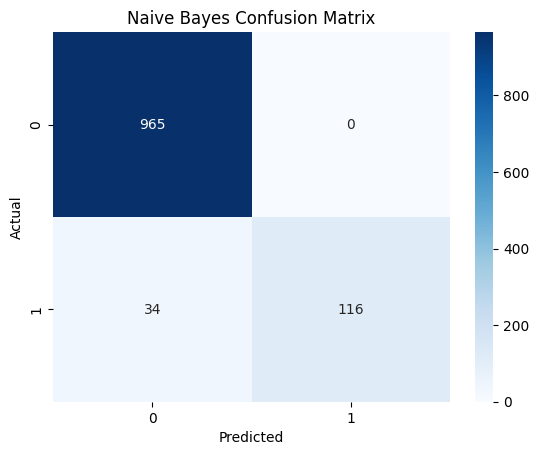

In [33]:

# Confusion Matrix (Naive Bayes)
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [34]:
# Train Logistic Regression Model

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [35]:
# Evaluate Logistic Regression

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.9461883408071748
Precision: 0.9591836734693877
Recall: 0.6266666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.96      0.63      0.76       150

    accuracy                           0.95      1115
   macro avg       0.95      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



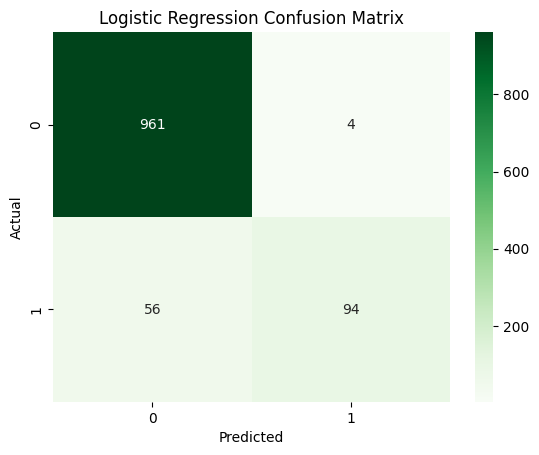

In [36]:
# Confusion Matrix (Logistic Regression)

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Save the Best Model & TF-IDF Vectorizer

In [37]:
# Import Pickle
import pickle


In [38]:
# Save the Naive Bayes Model
with open("spam_model.pkl", "wb") as model_file:
    pickle.dump(nb_model, model_file)


In [39]:
# Save the TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)


In [41]:
# Verify Saved Files

import os

os.path.getsize("spam_model.pkl"), os.path.getsize("tfidf_vectorizer.pkl")


(96608, 105856)

In [42]:
# Load the Model & Vectorizer (TEST)
with open("spam_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

with open("tfidf_vectorizer.pkl", "rb") as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)


In [43]:
# Test with a Custom Message 

sample_text = ["Congratulations! You have won a free ticket. Call now"]
sample_text_cleaned = [preprocess_text(sample_text[0])]
sample_vector = loaded_vectorizer.transform(sample_text_cleaned)

prediction = loaded_model.predict(sample_vector)
prediction


array([1])

In [ ]:
# [1]  → Spam

In [44]:
sample_text = ["Are we meeting tomorrow at 10?"]
sample_text_cleaned = [preprocess_text(sample_text[0])]
sample_vector = loaded_vectorizer.transform(sample_text_cleaned)

prediction = loaded_model.predict(sample_vector)
prediction

array([0])

In [ ]:
# [0]  → Ham or Not Spam